# 🏔️ Gradients & Optimization Visualization
**Calculus Foundations for Machine Learning**

> **Author**: Elite ML Educator
> **Goal**: To provide a visual and mathematical bridge between Calculus and Gradient Descent.

## 📹 Recommended Video Lectures
> 💡 **Pro Tip**: Visualizing 3D landscapes is hard. These videos are essential.

### 1️⃣ **StatQuest with Josh Starmer** 🟢
Master the fundamentals from the most popular ML educator
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=jC2IwhIM4RI) - Understanding optimization step by step
- [Derivatives and Gradients](https://www.youtube.com/watch?v=OLXvXw3qWLg) - Calculus made simple

### 2️⃣ **Steve Brunton - Engineering Math** 🟠
Rigorous mathematical approach to understanding gradients
- [Partial Derivatives](https://www.youtube.com/watch?v=U0ySXevjZaY) - The foundation of multivariable calculus
- [Gradient and Directional Derivatives](https://www.youtube.com/watch?v=ei-Ye9Y-qUc) - Moving in optimal directions

### 3️⃣ **3Blue1Brown - Essence of Calculus** 🔵
The best visual intuition for gradients ⭐
- [Gradient Visualization](https://www.youtube.com/watch?v=IHZwWFHWa-w) - Watch from 2:30-5:00 for key insights

In [9]:
# Video lectures are in the markdown cell above
# Watch them before continuing with the code examples

## 1. Introduction 📚

### 🧠 What is a Gradient?
In single-variable calculus, the **derivative** tells us the slope of a function at a point.
In multivariable calculus, the **gradient** is a **vector** that points in the direction of the **steepest ascent**.

> 🔑 **Key Insight**: To find the minimum (lowest point) of a loss function, we move in the **opposite** direction of the gradient. This is **Gradient Descent**.

### 🔢 Mathematical Definition
For a scalar function $f(x, y)$, the gradient is denoted by $\nabla f$ ("nabla f"):

$$\nabla f(x, y) = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}$$

It is essentially a vector collecting all the partial derivatives.

### ⚙️ Setup & Imports


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Elite Visual Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline


---
## 2. 1D Gradient Descent 📉

Let's start with a simple convex function:
$$ f(x) = x^2 $$

The derivative is:
$$ f'(x) = 2x $$

**Algorithm Rule**:
$$ x_{new} = x_{old} - \eta \cdot 
abla f(x_{old}) $$
Where $\eta$ (eta) is the **Learning Rate**.



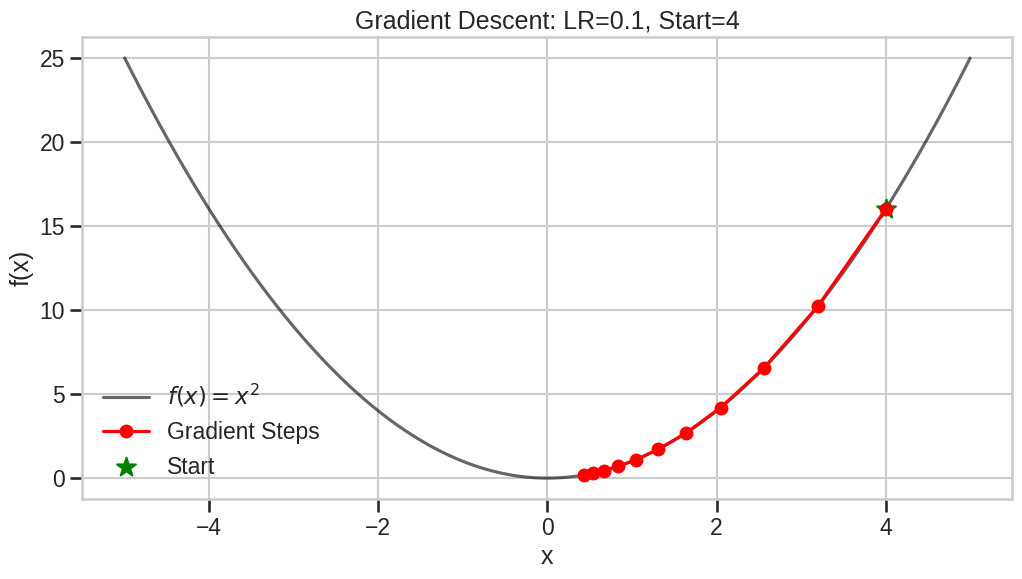

In [11]:
def f(x):
    return x**2

def df(x):
    return 2*x

# Visualization Function
def plot_gradient_descent_1d(start_x, learning_rate, n_steps=10):
    x_path = [start_x]
    y_path = [f(start_x)]
    
    current_x = start_x
    for _ in range(n_steps):
        grad = df(current_x)
        current_x = current_x - learning_rate * grad
        x_path.append(current_x)
        y_path.append(f(current_x))
        
    # Plotting
    x_axis = np.linspace(-5, 5, 100)
    plt.figure(figsize=(12, 6))
    plt.plot(x_axis, f(x_axis), 'k-', alpha=0.6, label='$f(x)=x^2$')
    plt.plot(x_path, y_path, 'ro-', label='Gradient Steps')
    plt.scatter(x_path[0], y_path[0], s=200, c='green', marker='*', label='Start')
    plt.title(f'Gradient Descent: LR={learning_rate}, Start={start_x}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

# Run Demo
plot_gradient_descent_1d(start_x=4, learning_rate=0.1)


### ⚠️ The Effect of Learning Rate
*   **Too Small**: Convergence is agonizingly slow.
*   **Too Large**: Overshooting and divergence.



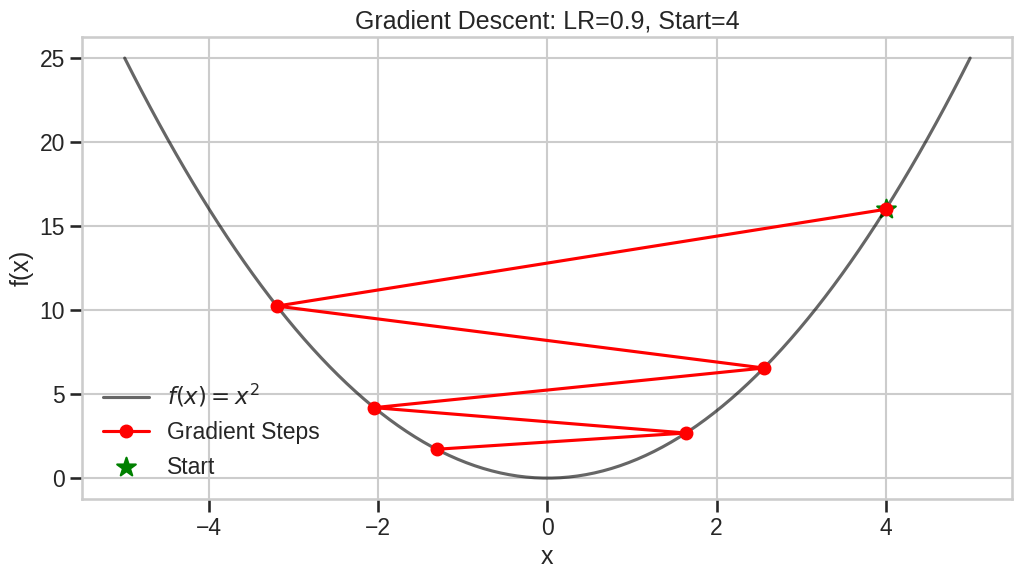

In [12]:
# Huge Learning Rate -> Overshooting
plot_gradient_descent_1d(start_x=4, learning_rate=0.9, n_steps=5)


---
## 3. 2D Gradients & Vector Fields 🧭

Let's move to 2 variables: $f(x, y) = x^2 + y^2$. This looks like a bowl.
The gradient is:
$$ 
abla f(x, y) = [2x, 2y] $$

### 🧪 Visualizing the Vector Field
At every point $(x, y)$, we calculate the gradient vector and plot it.



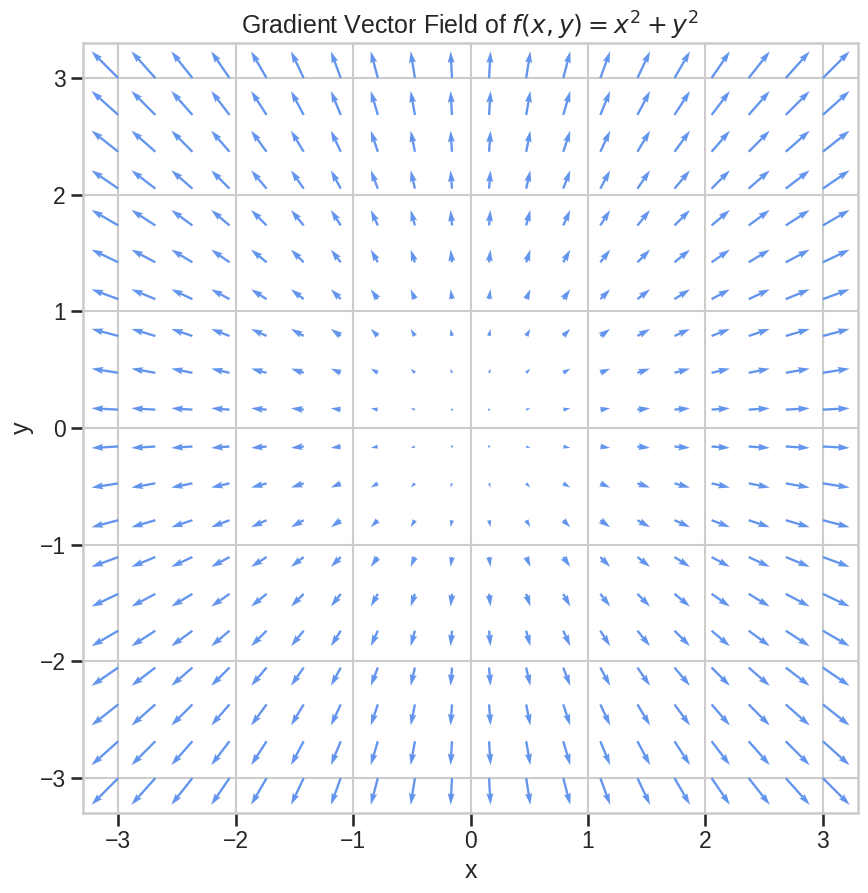

In [13]:
def f_2d(x, y):
    return x**2 + y**2

x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
U = 2*X  # Partial derivative wrt x
V = 2*Y  # Partial derivative wrt y

plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, color='cornflowerblue')
plt.title('Gradient Vector Field of $f(x,y) = x^2 + y^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



> 🧠 **Interpretation**: Notice how all arrows point **away** from the center $(0,0)$?
> That's because the gradient points to **ascent** (getting higher).
> To optimize, we walk **against** the arrows.



---
## 4. Contour Plots & Optimization Paths 🗺️

Contour plots visualize 3D surfaces in 2D. Lines represent constant height.
Gradients are always **perpendicular** to contour lines.



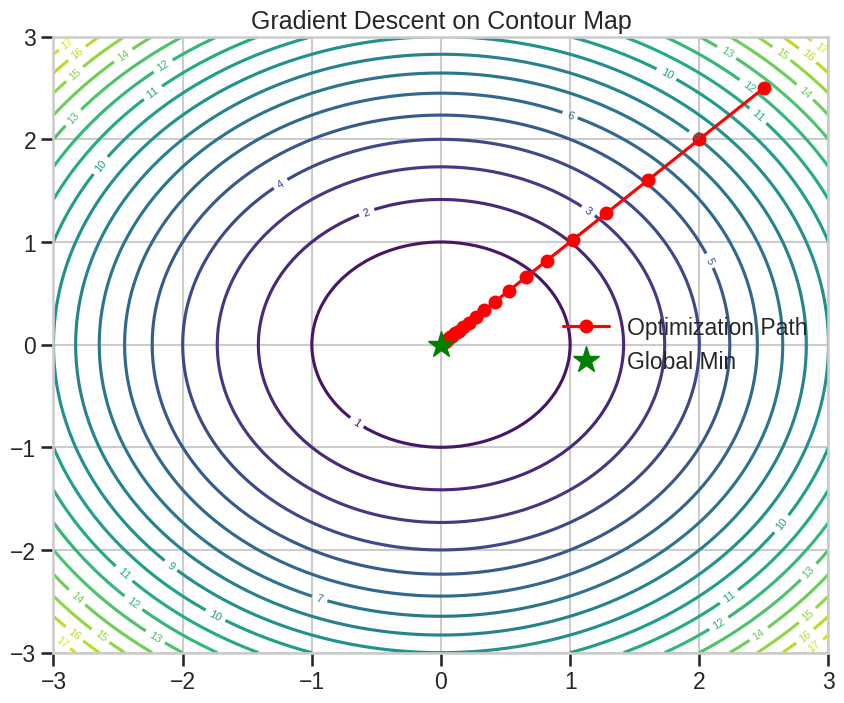

In [14]:
def gradient_descent_2d(start_x, start_y, lr, n_steps=20):
    path = []
    x, y = start_x, start_y
    path.append((x, y))
    
    for _ in range(n_steps):
        grad_x = 2*x
        grad_y = 2*y
        x = x - lr * grad_x
        y = y - lr * grad_y
        path.append((x, y))
    return np.array(path)

# Calculate Path
path = gradient_descent_2d(2.5, 2.5, lr=0.1)

# Plotting
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f_2d(X, Y)

plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Optimization Path')
plt.plot(0, 0, 'g*', ms=20, label='Global Min')
plt.title('Gradient Descent on Contour Map')
plt.legend()
plt.show()


---
## 5. Advanced Optimization: Momentum 🚀

Simple Gradient Descent can get stuck in "valleys" or oscillate.
**Momentum** adds a fraction of the *previous* update to the current one, like a heavy ball rolling down a hill gaining speed.

> 🔢 **Formula**:
> $$ v_t = \gamma v_{t-1} + \eta 
abla f(	heta) $$
> $$ 	heta = 	heta - v_t $$



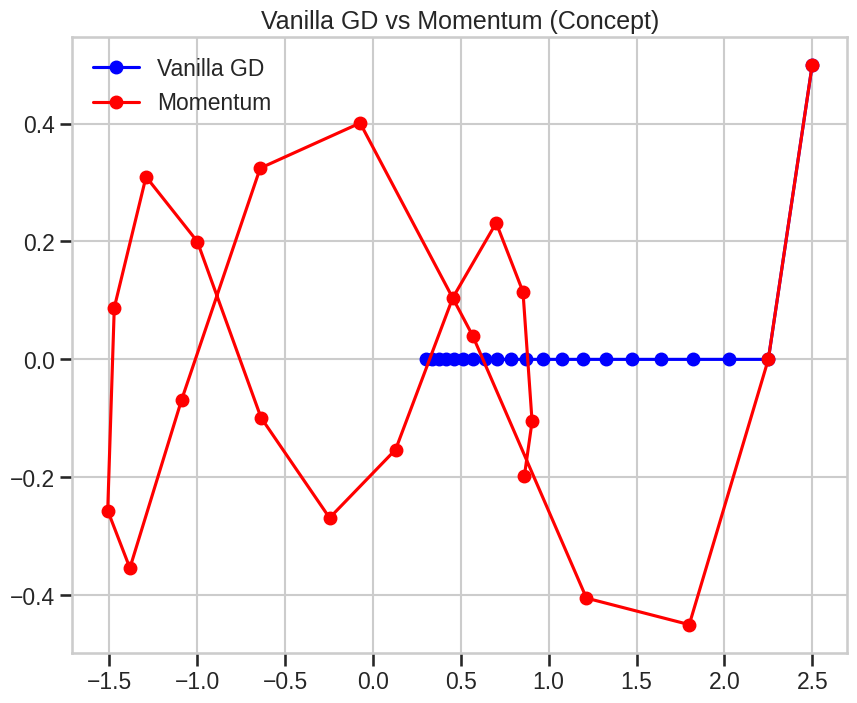

In [15]:
# Implementation of Momentum
def momentum_descent(start_x, start_y, lr, gamma, n_steps=20):
    path = []
    x, y = start_x, start_y
    vx, vy = 0, 0
    path.append((x, y))
    
    for _ in range(n_steps):
        grad_x = 2*x
        grad_y = 20*y # Scale y to simulate a narrow valley
        
        vx = gamma * vx + lr * grad_x
        vy = gamma * vy + lr * grad_y
        
        x = x - vx
        y = y - vy
        path.append((x, y))
    return np.array(path)

# Comparing
path_sgd = momentum_descent(2.5, 0.5, lr=0.05, gamma=0) # Regular GD
path_mom = momentum_descent(2.5, 0.5, lr=0.05, gamma=0.9) # Momentum

# Just assume simple function for viz
plt.figure(figsize=(10, 8))
plt.plot(path_sgd[:, 0], path_sgd[:, 1], 'bo-', label='Vanilla GD')
plt.plot(path_mom[:, 0], path_mom[:, 1], 'ro-', label='Momentum')
plt.title('Vanilla GD vs Momentum (Concept)')
plt.legend()
plt.show()



> 💡 **Observation**: Momentum allows the optimizer to build up speed and traverse flat areas faster, and dampens oscillations in narrow valleys.



---
## 6. Real World: Linear Regression 🏠

In Machine Learning, we don't control the function $f(x)$. The function is the **Loss Surface** created by our data.

Let's try to fit a line $y = mx + b$. The parameters we optimize are not x and y, but $m$ and $b$!



Independent term (b): 3.49 (Expected: 4)
Slope (m): 3.41 (Expected: 3)


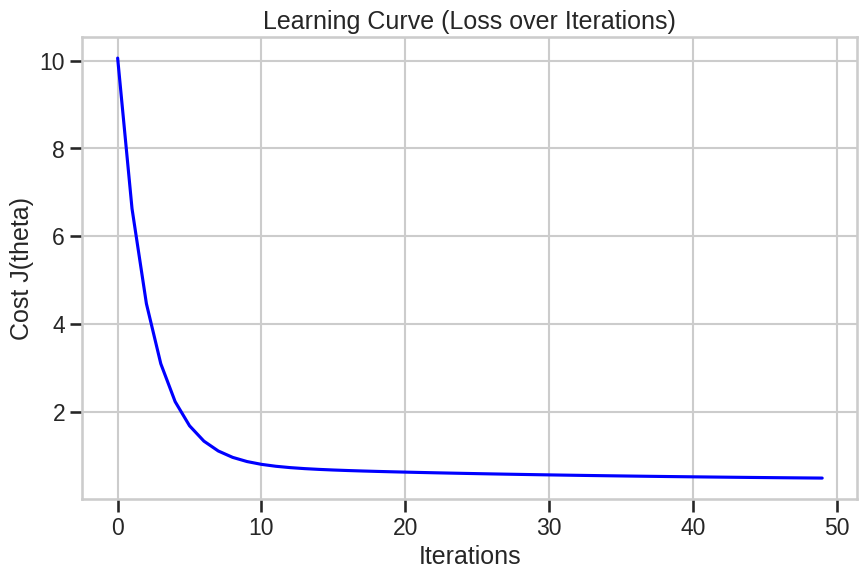

In [16]:
# Generate Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Loss Function (MSE)
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent for LR
def gradient_descent_lr(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * lr * (X.T.dot((prediction - y)))
        cost_history[i] = compute_cost(theta, X, y)
        
    return theta, cost_history

# Setup
X_b = np.c_[np.ones((100, 1)), X] # Add bias term
theta_init = np.random.randn(2, 1)

# Run
theta_final, cost_history = gradient_descent_lr(X_b, y, theta_init, lr=0.1, iterations=50)

print(f"Independent term (b): {theta_final[0][0]:.2f} (Expected: 4)")
print(f"Slope (m): {theta_final[1][0]:.2f} (Expected: 3)")

# Plot Learning Curve
plt.figure()
plt.plot(range(50), cost_history, 'b-')
plt.title('Learning Curve (Loss over Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Cost J(theta)')
plt.show()


---
## 7. Summary & Key Takeaways 📝

*   **Gradient**: Vector pointing to steepest ascent.
*   **Gradient Descent**: Step-by-step optimization by moving opposite to the gradient.
*   **Learning Rate**: Crucial hyperparameter. Too small = slow; Too big = diverge.
*   **Dimensions**: The geometric intuition (Tangent -> Vector Field -> Hyperplane) holds in high dimensions.

## 📚 Further Reading
*   [Distill.pub: Why Momentum Really Works](https://distill.pub/2017/momentum/)
*   [Khan Academy: Multivariable Calculus](https://www.khanacademy.org/math/multivariable-calculus)

